In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df1 = pd.read_csv("2005_2007.csv", low_memory = False)
df2 = pd.read_csv("2009_2011.csv", low_memory = False)
df3 = pd.read_csv("2012_2014.csv", low_memory = False)
#veri setleri yüklendi
#low_memory=False: Pandas bazı sütunların veri tipini doğru anlamakta zorlandığında uyarı verir, bunu önlemek için kullanılır.

In [67]:
df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)
#üç csv birleştirildi
#ignore_index=True: Yeni oluşturulan df'te index sıfırlanıyor, önceki dosyalardaki satır numaraları dikkate alınmıyor.

In [29]:
df.info()
#genel bilgi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [30]:
#df veri setinden 21 adet gereksiz veya analiz için anlamlı olmayan sütun çıkarılıyor.
data = df.drop([
    'Accident_Index',
    'Location_Easting_OSGR',
    'Location_Northing_OSGR',
    'Longitude',
    'Latitude',
    'Local_Authority_(District)',
    'Local_Authority_(Highway)',
    'Junction_Detail',
    'Junction_Control',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'LSOA_of_Accident_Location',
    '1st_Road_Number', 
    '1st_Road_Class',
    'Police_Force'  ,
    'Day_of_Week'
], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   Accident_Severity        1504150 non-null  int64 
 1   Number_of_Vehicles       1504150 non-null  int64 
 2   Number_of_Casualties     1504150 non-null  int64 
 3   Date                     1504150 non-null  object
 4   Time                     1504033 non-null  object
 5   Road_Type                1504150 non-null  object
 6   Speed_limit              1504150 non-null  int64 
 7   Light_Conditions         1504150 non-null  object
 8   Weather_Conditions       1504024 non-null  object
 9   Road_Surface_Conditions  1502192 non-null  object
 10  Urban_or_Rural_Area      1504150 non-null  int64 
 11  Year                     1504150 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 137.7+ MB


In [31]:
data.head() #ilk beş veri gelir

,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Time,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,04/01/2005,17:42,Single carriageway,30,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,05/01/2005,17:36,Dual carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,06/01/2005,00:15,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,07/01/2005,10:35,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,10/01/2005,21:13,Single carriageway,30,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005


In [32]:
#eksik verileri bulma
data.isna().sum().sort_values(ascending=False)

Road_Surface_Conditions    1958
Weather_Conditions          126
Time                        117
Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Date                          0
Road_Type                     0
Speed_limit                   0
Light_Conditions              0
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [69]:
# Fonksiyon: İstatistiksel özet çıkar
#Sadece sayısal sütunları (int64, float64) alıyor.
#describe() ile temel istatistikleri hesaplıyor.
#Ek olarak medyan (median), eksik değer sayısı (missing_value) ve eksik değer oranını (missing_value_rate) ekliyor.
def sum_num(df, name="Veri Seti"):
    num_df = df.select_dtypes(include=["int64", "float64"])
    summary = num_df.describe().T
    summary["median"] = num_df.median()
    summary["missing_value"]= num_df.isnull().sum()
    summary["missing_value_rate"]=num_df.isnull().mean()*100
    summary = summary[["mean", "median", "std", "min", "25%", "50%", "75%", "max","missing_value","missing_value_rate"]]
    print(f"\n--- {name} için istatistiksel özet ---\n")
    print(summary)

# data set özeti
sum_num(data, "data.csv")


--- data.csv için istatistiksel özet ---

                           mean  median        std   min   25%   50%   75%  \
Accident_Severity      2.838190     3.0   0.401842   1.0   3.0   3.0   3.0   
Number_of_Vehicles     1.831606     2.0   0.714759   1.0   1.0   2.0   2.0   
Number_of_Casualties   1.350960     1.0   0.825335   1.0   1.0   1.0   1.0   
Speed_limit           39.005398    30.0  14.139928  10.0  30.0  30.0  50.0   
Urban_or_Rural_Area    1.353871     1.0   0.478353   1.0   1.0   1.0   2.0   

                       max  missing_value  missing_value_rate  
Accident_Severity      3.0              0                 0.0  
Number_of_Vehicles    67.0              0                 0.0  
Number_of_Casualties  93.0              0                 0.0  
Speed_limit           70.0              0                 0.0  
Urban_or_Rural_Area    3.0              0                 0.0  


In [70]:
# Fonksiyon: Eksik değerleri analiz et
#bütün sütunlarda eksik gözlem sayısını ve yüzdesini hesaplıyor.
#Sadece eksik değeri > 0 olan sütunları listeliyor.
def missing_values(data, name="Veri Seti"):
    missing = data.isnull().sum()
    percent = (missing / len(df)) * 100
    result = pd.DataFrame({'Eksik Değer Sayısı': missing, 'Yüzde (%)': percent})
    result = result[result['Eksik Değer Sayısı'] > 0]
    print(f"\n{name} Eksik Değerler:\n", result)

missing_values(data, "data")


data Eksik Değerler:
                          Eksik Değer Sayısı  Yüzde (%)
Time                                    117   0.007778
Weather_Conditions                      126   0.008377
Road_Surface_Conditions                1958   0.130173


In [72]:
# Sayısal değişkenleri al
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

#Aykırı değer tespiti (IQR yöntemi)
#Her sayısal sütun için Interquartile Range (IQR) hesaplar.
#Aykırı sınırlar:
#Lower bound = Q1 − 1.5 × IQR
#Upper bound = Q3 + 1.5 × IQR
#Bu aralığın dışındaki gözlemler “aykırı” sayılır.
#Her sütun için aykırı gözlem sayısını ve tüm veri setine oranını döndürür.
def detect_outliers_iqr(data, columns):
    summary = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = data[(data[col] < lower) | (data[col] > upper)].shape[0]
        summary[col] = {
            "Aykırı Değer Sayısı": outlier_count,
            "Oran (%)": round(outlier_count / len(data) * 100, 2)
        }
    return pd.DataFrame(summary).T

# Aykırı değer raporu
outlier_summary = detect_outliers_iqr(data, numeric_cols)
print(outlier_summary)

                      Aykırı Değer Sayısı  Oran (%)
Accident_Severity                223945.0     14.89
Number_of_Vehicles                34081.0      2.27
Number_of_Casualties             350294.0     23.29
Speed_limit                           0.0      0.00
Urban_or_Rural_Area                   0.0      0.00


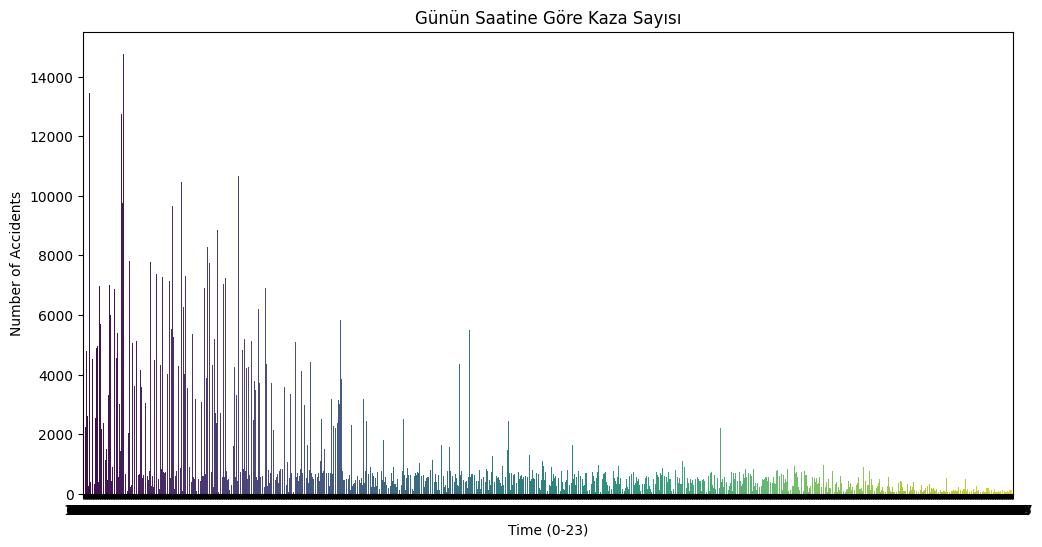

In [76]:
#0‑23 saatleri arasındaki kaza sayısını sütun grafiğiyle gösterir.(24 renkten oluşan bir ölçek).
plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=data, hue='Time', palette='viridis', legend=False)
plt.title('Günün Saatine Göre Kaza Sayısı')
plt.xlabel('Time (0-23)')
plt.ylabel('Number of Accidents')
plt.show()

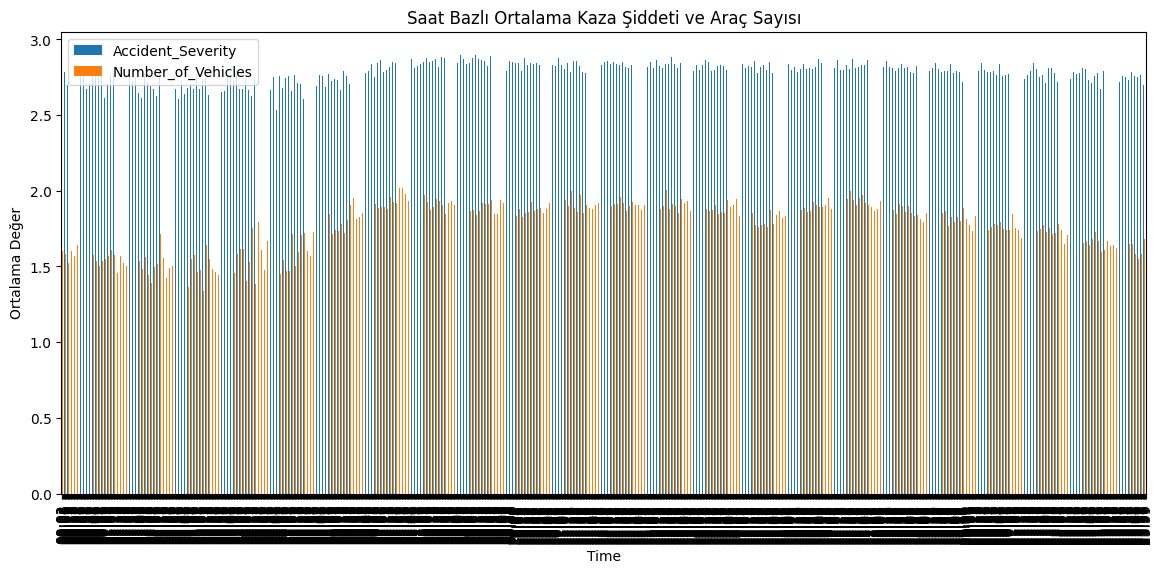

In [73]:
#Her saat için ortalama kaza şiddeti ve ortalama araç sayısını yan yana çubuklarla çizer.
hourly_stats = data.groupby('Time')[['Accident_Severity', 'Number_of_Vehicles']].mean()

hourly_stats.plot(kind='bar', figsize=(14,6))
plt.title("Saat Bazlı Ortalama Kaza Şiddeti ve Araç Sayısı")
plt.ylabel("Ortalama Değer")
plt.show()

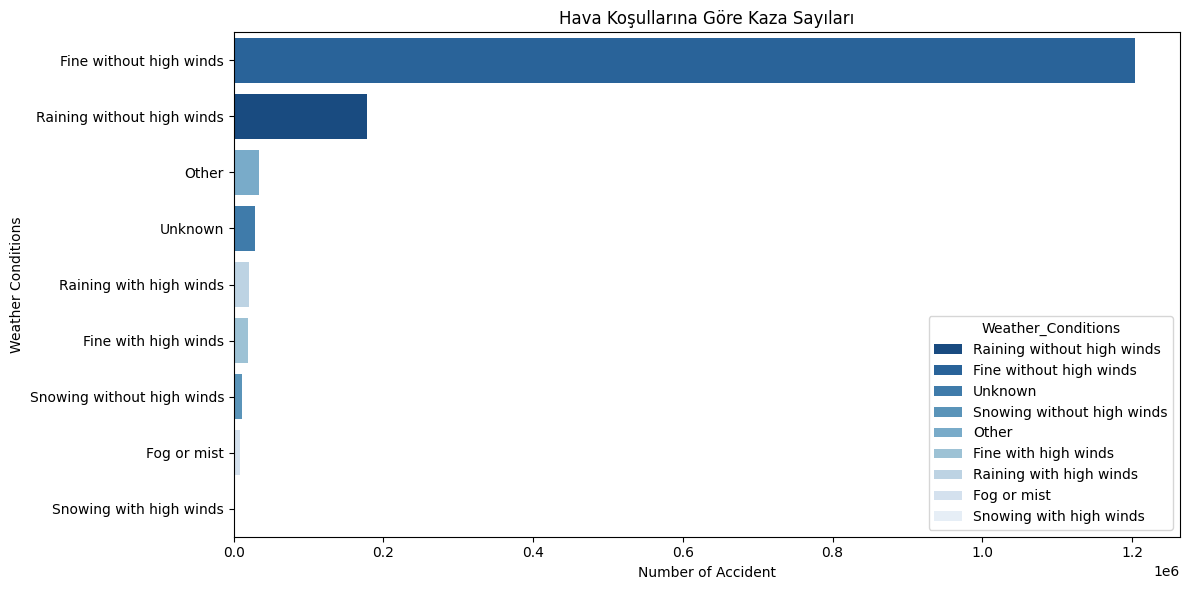

In [75]:
#hava durumuna göre kaza sayısı
plt.figure(figsize=(12, 6))
sns.countplot(y='Weather_Conditions', data=data, hue='Weather_Conditions', order=data['Weather_Conditions'].value_counts().index, palette='Blues_r')
plt.title("Hava Koşullarına Göre Kaza Sayıları")
plt.xlabel("Number of Accident")
plt.ylabel("Weather Conditions")
plt.tight_layout()
plt.show()

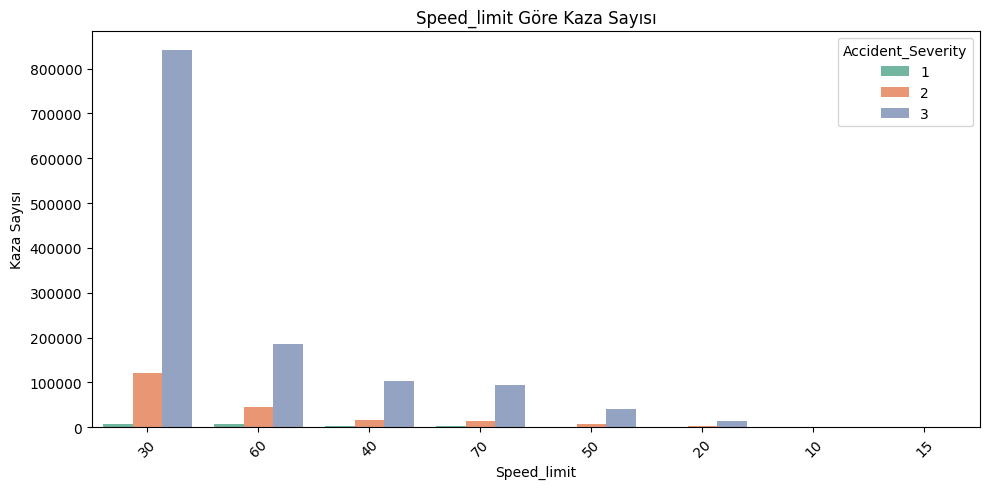

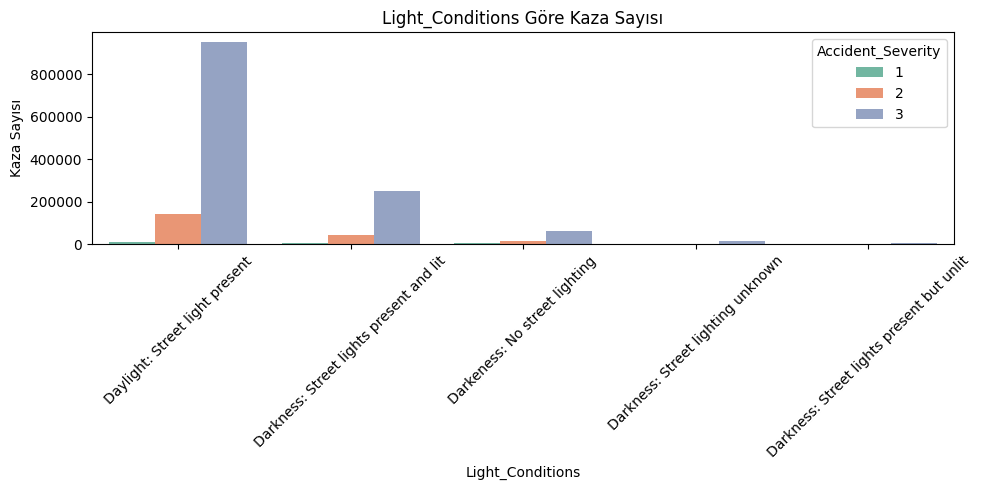

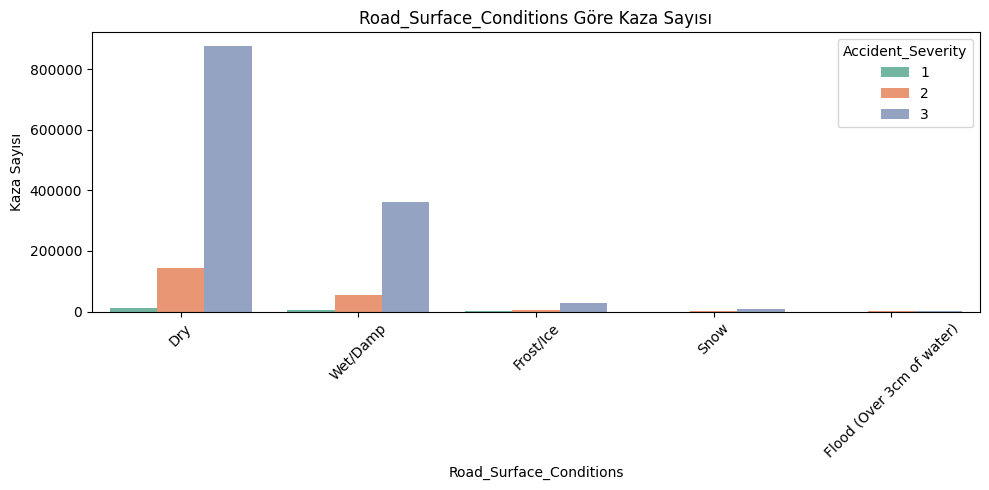

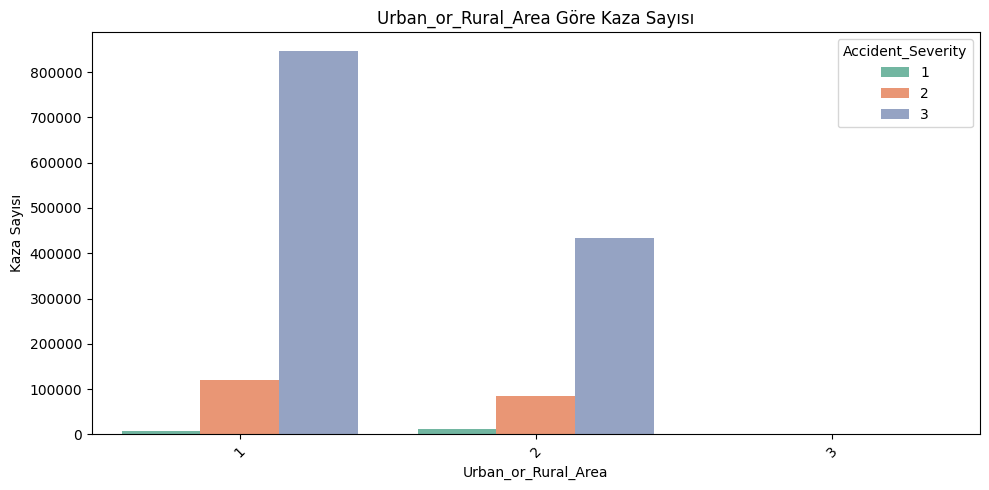

In [53]:
#Her değişkenin (hız limiti, ışık koşulları, yol yüzeyi, kentsel/kırsal) seviyelerine göre kaza sayısını ve şiddet dağılımını gösterir.
categorical_vars = ['Speed_limit', 'Light_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area']

for var in categorical_vars:
    plt.figure(figsize=(10,5))
    sns.countplot(data=data, hue='Accident_Severity', x=var, order=data[var].value_counts().index, palette='Set2')
    plt.title(f"{var} Göre Kaza Sayısı")
    plt.xticks(rotation=45)
    plt.ylabel("Kaza Sayısı")
    plt.tight_layout()
    plt.show()

In [54]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

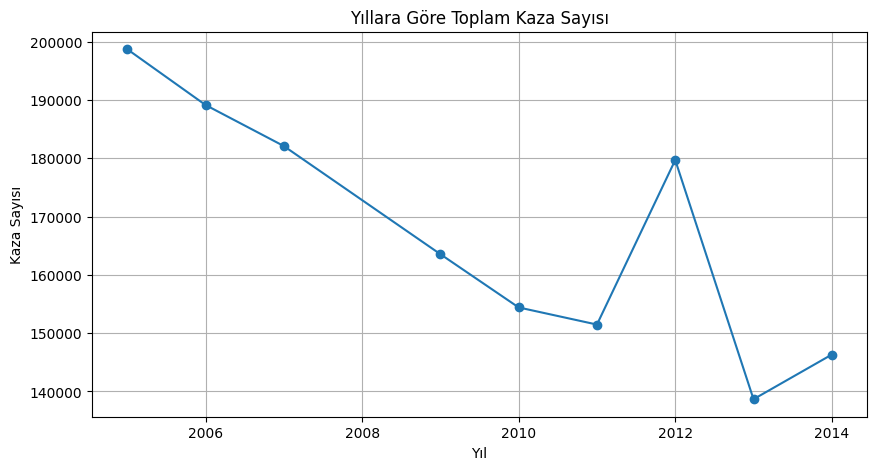

In [55]:
#Yıl, ay, haftanın günü vb. ek değişkenler çıkararak zaman serisi analizleri yapabilmek.
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Weekday'] = data['Date'].dt.day_name()
data['Month_Name'] = data['Date'].dt.month_name()

yearly = data.groupby('Year').size()

plt.figure(figsize=(10, 5))
yearly.plot(marker='o')
plt.title("Yıllara Göre Toplam Kaza Sayısı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Sayısı")
plt.grid(True)
plt.show()

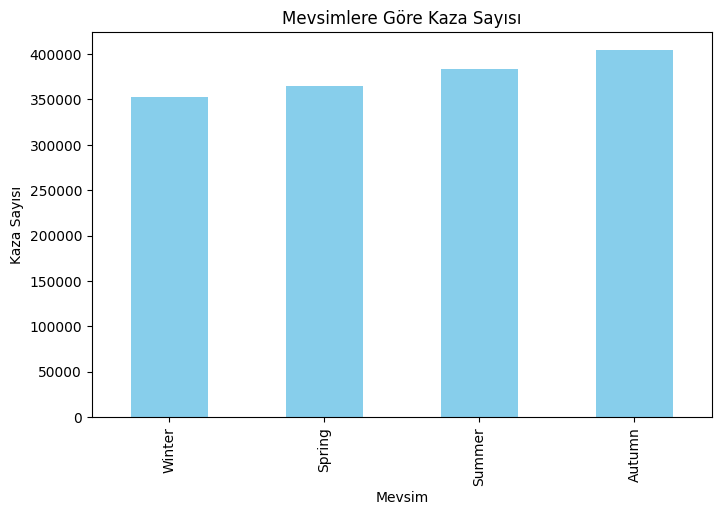

In [56]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

data['Season'] = data['Month'].apply(get_season)

seasonal = data['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

plt.figure(figsize=(8,5))
seasonal.plot(kind='bar', color='skyblue')
plt.title("Mevsimlere Göre Kaza Sayısı")
plt.ylabel("Kaza Sayısı")
plt.xlabel("Mevsim")
plt.show()

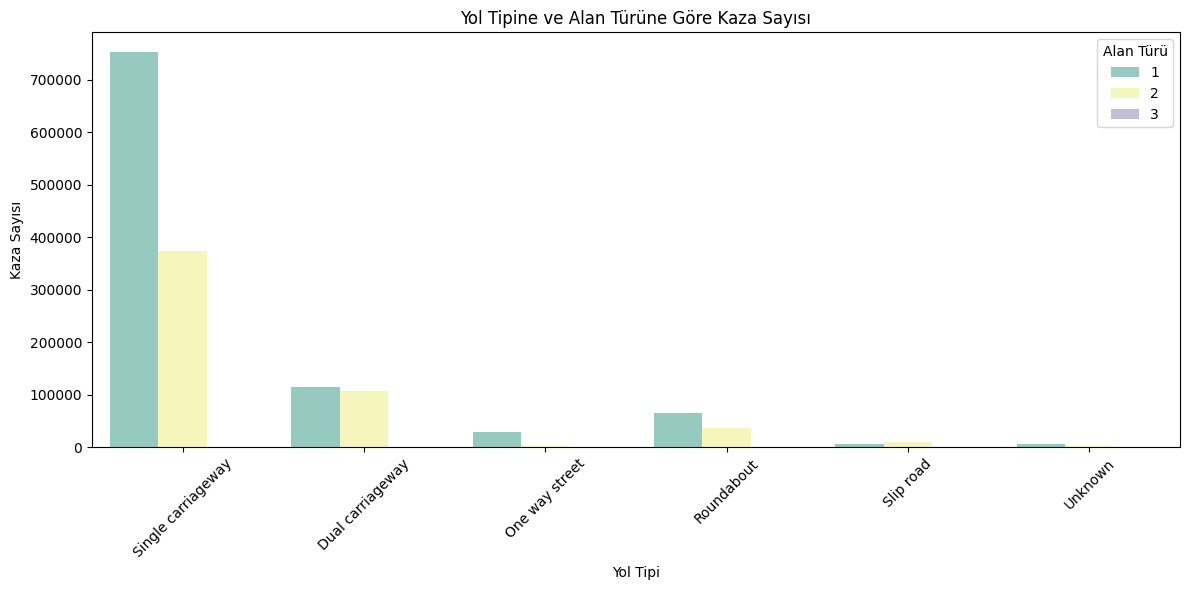

In [64]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, hue='Urban_or_Rural_Area', x='Road_Type', palette='Set3')
plt.title("Yol Tipine ve Alan Türüne Göre Kaza Sayısı")
plt.xlabel("Yol Tipi")
plt.ylabel("Kaza Sayısı")
plt.xticks(rotation=45)
plt.legend(title='Alan Türü')
plt.tight_layout()
plt.show()